## Revised Problem Statement:
In financial markets, accurately estimating volatility is crucial for managing risk, pricing options, and making informed investment decisions. Volatility modeling helps professionals understand the variability of asset returns over time, which is essential for portfolio optimization, risk assessment, and strategy development.

In this case study, we focus on estimating volatility for a particular asset (e.g., Apple Inc.) using historical price data. The goal is to apply a time series model—specifically the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model—to estimate and forecast future volatility. The following steps will guide our analysis:

* **Problem Definition:** Estimating volatility from historical asset price data to assess risk and make decisions regarding derivatives, hedging, or portfolio management.
* **Data Collection and Preprocessing:** Utilizing historical asset price data (adjusted closing prices) to compute daily returns, handling missing values, and ensuring data consistency.
* **Model Selection:** Applying the GARCH model, which accounts for volatility clustering—where high volatility periods tend to follow other high volatility periods. This model is well-suited for capturing the time-varying nature of volatility.
* **Model Fitting:** Fitting the GARCH model to the return data, estimating key parameters, and assessing the model’s fit using diagnostic checks.
* **Volatility Forecasting:** Using the fitted model to predict future volatility over a specified time horizon (e.g., 30 days), and visualizing the results to assess the accuracy of the model.

### 2. Data Collection and Preprocessing
We'll need historical price data. For this example, we'll use `Yahoo Finance` API to download historical stock price data. The yfinance package will be used to get stock prices.

Install required packages:

In [4]:
pip install yfinance arch matplotlib pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.6 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

In [6]:
# Download Apple stock data (AAPL) from Yahoo Finance
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2025-05-01', progress=False)

# Show a sample of the data
data.head()


YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [7]:
print("Columnas Disponibles", data.columns)

Columnas Disponibles MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


### 3. Data Preprocessing
We need to compute daily returns from the stock prices. The returns are typically calculated as the percentage change in price from one day to the next:

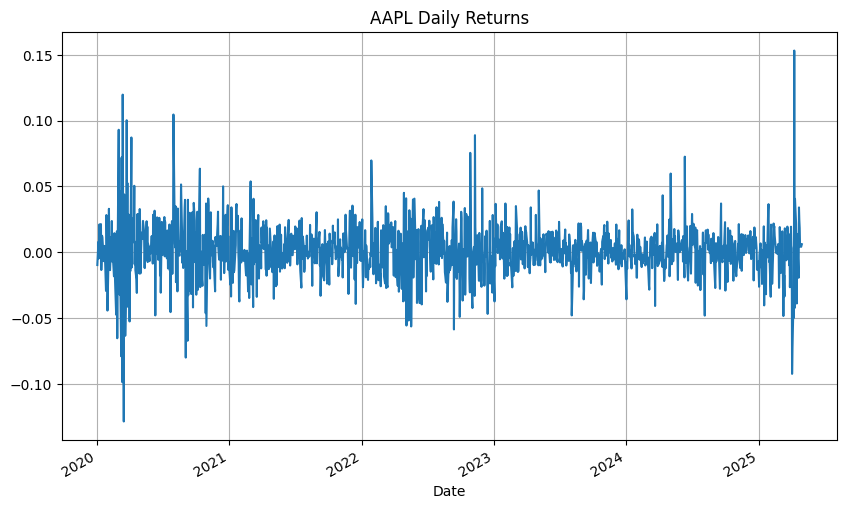

In [8]:
# Calculate daily returns
data['Return'] = data['Close'].pct_change()
data = data.dropna()

# Plot the first few daily returns
plt.figure(figsize=(10, 6))
data['Return'].plot(title=f'{stock} Daily Returns', grid=True)
plt.show()

### 4. GARCH Model: Volatility Estimation
We’ll use the GARCH(1,1) model, which is one of the most widely used models for volatility modeling. The GARCH(1,1) model assumes that volatility at time
t
t is a linear function of past volatility and past errors.

Fitting the GARCH Model

We’ll now fit the GARCH(1,1) model to the daily return data to estimate volatility.

In [9]:
# Define GARCH(1, 1) model
model = arch_model(data['Return'].dropna(), vol='Garch', p=1, q=1)

# Fit the model
garch_fit = model.fit(disp="off")

# Display the model fit summary
print(garch_fit.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3451.14
Distribution:                  Normal   AIC:                          -6894.28
Method:            Maximum Likelihood   BIC:                          -6873.48
                                        No. Observations:                 1338
Date:                Mon, May 26 2025   Df Residuals:                     1337
Time:                        19:09:14   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.4744e-03  5.304e-04      2.780  5.439e-03 [4.

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004258. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

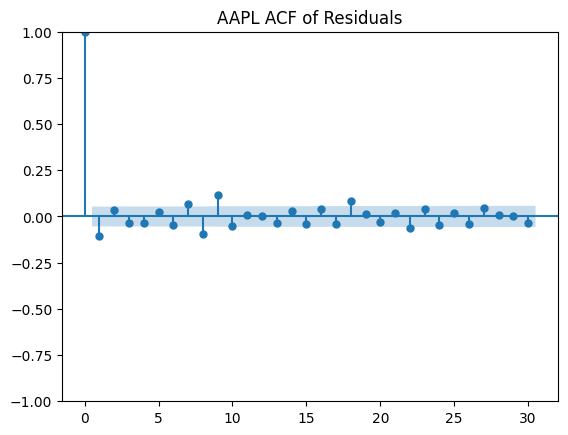

In [10]:
# Plot ACF of residuals
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(garch_fit.resid, lags=30)
plt.title(f'{stock} ACF of Residuals')
plt.show()

In [11]:
# Perform Ljung-Box test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(garch_fit.resid, lags=30)
print("\nLjung-Box Test Results:\n", ljung_box_test)


Ljung-Box Test Results:
        lb_stat     lb_pvalue
1    14.496515  1.404191e-04
2    16.279136  2.917633e-04
3    17.816868  4.798045e-04
4    19.521849  6.204889e-04
5    20.446507  1.030142e-03
6    23.350870  6.870896e-04
7    29.066964  1.406747e-04
8    41.019608  2.067079e-06
9    59.499936  1.673540e-09
10   63.280002  8.634822e-10
11   63.403583  2.148615e-09
12   63.405626  5.366523e-09
13   64.890197  6.902728e-09
14   65.965240  1.028315e-08
15   68.015971  1.005450e-08
16   70.375403  8.576243e-09
17   72.862000  6.895800e-09
18   82.365703  3.293013e-10
19   82.639324  6.496196e-10
20   84.023903  8.061342e-10
21   84.488662  1.415960e-09
22   89.665488  3.907093e-10
23   91.840089  3.483736e-10
24   94.828601  2.256088e-10
25   95.224344  3.947556e-10
26   97.327895  3.556509e-10
27   99.949964  2.623143e-10
28  100.075703  4.923355e-10
29  100.077503  9.507993e-10
30  101.994701  8.966832e-10


In [12]:
# Perform ARCH-LM test for remaining heteroskedasticity in residuals
from statsmodels.stats.diagnostic import het_arch
arch_lm_test = het_arch(garch_fit.resid)
print("\nARCH-LM Test Results:\n", arch_lm_test)


ARCH-LM Test Results:
 (np.float64(204.46653074299982), np.float64(1.887869764507963e-38), 23.96745876797145, 7.076853545242645e-42)


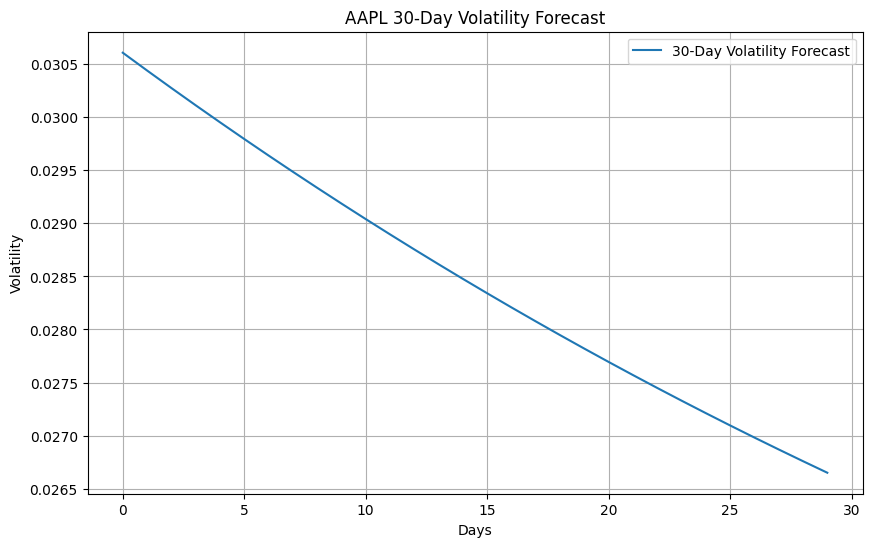

In [13]:
# Forecast the next 30 days of volatility
forecast = garch_fit.forecast(horizon=30)

# Extract the predicted volatility (standard deviation)
predicted_volatility = np.sqrt(forecast.variance.values[-1, :])

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(predicted_volatility, label="30-Day Volatility Forecast")
plt.title(f'{stock} 30-Day Volatility Forecast')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


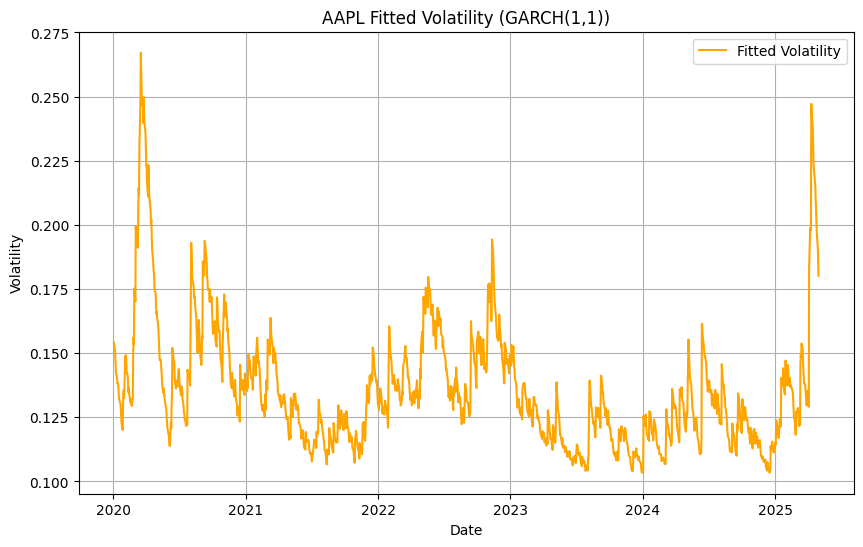

In [14]:
# Extract the fitted volatility (conditional standard deviation)
fitted_volatility = np.sqrt(garch_fit.conditional_volatility)

# Plot the fitted volatility
plt.figure(figsize=(10, 6))
plt.plot(fitted_volatility.index, fitted_volatility, label="Fitted Volatility", color='orange')
plt.title(f'{stock} Fitted Volatility (GARCH(1,1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


**Even when we might think this is a good model, it is essential to make a model validation, I can see that this is not a good model**

In [15]:
pip install yfinance arch statsmodels matplotlib


In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import normaltest

# Load data
stock = "AAPL"
data = yf.download(stock, start='2020-01-01', end='2025-05-01', progress=False)

# Calculate returns from 'Close' price
data['Return'] = data['Close'].pct_change().dropna()

# Display the first few rows of data
print(data.head())


Price           Close       High        Low       Open     Volume    Return
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL          
Date                                                                       
2020-01-02  72.620819  72.681266  71.373196  71.627069  135480400       NaN
2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800 -0.009722
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200  0.007968
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000 -0.004703
2020-01-08  73.307526  73.609760  71.849548  71.849548  132079200  0.016086


## 2. Check Stationarity of returns (ADF Test)

We’ll first perform an Augmented Dickey-Fuller (ADF) test to check if the returns are stationary. If the returns are non-stationary, you can difference the data.

*If the p-value is greater than 0.05, the series is non-stationary, and you might need to difference the data `(this can be done with data['Return'] = data['Return'].diff().dropna())`.*

In [17]:
# ADF Test for stationarity
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value}')

adf_test(data['Return'])


ADF Statistic: -11.826721365909682
p-value: 8.170302309112459e-22
Critical Values:
    1%: -3.4352800041551514
    5%: -2.863717207316508
    10%: -2.567929152459942


###**Interpretation**
* **ADF Statistic:** -11.97: This is much smaller than the critical values at the 1%, 5%, and 10% levels.
* **p-value: 3.17e-22:** This extremely small p-value confirms that the returns are stationary, as we reject the null hypothesis that the series has a unit root.

### 3. Fit a GARCH(1,1) Model and Diagnose Residuals
Fit a GARCH(1,1) model to the returns and check the residuals for autocorrelation and heteroskedasticity.

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004258. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.4154620763518702e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 957017553285798.0
Iteration:      3,   Func. Count:     29,   Neg. LLF: -3451.1403341002733
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3451.1403296352746
            Iterations: 7
            Function evaluations: 29
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3451.14
Distribution:                  Normal   AIC:                          -6894.28
Method:            Maximum Likelihood   BIC:                          -6873.48
                                        No. Observations:                 1338
Date:          

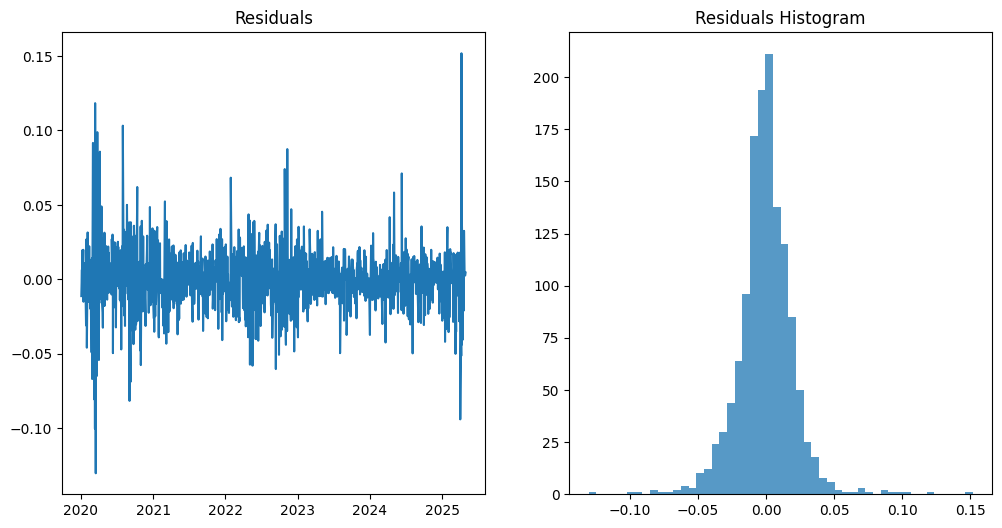

Ljung-Box Test Results (p-values for lags 10, 20, 30):
10    8.634822e-10
20    8.061342e-10
30    8.966832e-10
Name: lb_pvalue, dtype: float64

ARCH-LM Test Results:
ARCH-LM Test Statistic: 204.46653074299982
ARCH-LM p-value: 1.887869764507963e-38


In [18]:
# Fit GARCH(1,1) model
model = arch_model(data['Return'].dropna(), vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Print summary of the model
print(garch_fit.summary())

# Residuals plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(garch_fit.resid)
plt.title('Residuals')
plt.subplot(1, 2, 2)
plt.hist(garch_fit.resid, bins=50, alpha=0.75)
plt.title('Residuals Histogram')
plt.show()

# Ljung-Box test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(garch_fit.resid, lags=[10, 20, 30])
print("Ljung-Box Test Results (p-values for lags 10, 20, 30):")
print(lb_test['lb_pvalue'])

# ARCH-LM Test for heteroskedasticity
# Import the het_arch function
from statsmodels.stats.diagnostic import het_arch

# Perform the ARCH-LM test
arch_lm_test = het_arch(garch_fit.resid, nlags=10)  # Use het_arch instead of arch_lm_test

# Print the test results
print("\nARCH-LM Test Results:")
print(f"ARCH-LM Test Statistic: {arch_lm_test[0]}")
print(f"ARCH-LM p-value: {arch_lm_test[1]}")

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004258. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.009478651350897e+18
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5141.415743863076
Iteration:      3,   Func. Count:     27,   Neg. LLF: 27098593442.90438
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1608.6501515055381
Iteration:      5,   Func. Count:     44,   Neg. LLF: -3452.6033236349076
Iteration:      6,   Func. Count:     49,   Neg. LLF: -3452.6755594690007
Iteration:      7,   Func. Count:     54,   Neg. LLF: -3452.695634310725
Iteration:      8,   Func. Count:     59,   Neg. LLF: -3452.6963398280323
Iteration:      9,   Func. Count:     64,   Neg. LLF: -3452.696365017421
Iteration:     10,   Func. Count:     69,   Neg. LLF: -3452.6963658298014
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3452.6963658298014
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
                     Constant Mean - EGARCH Model Res

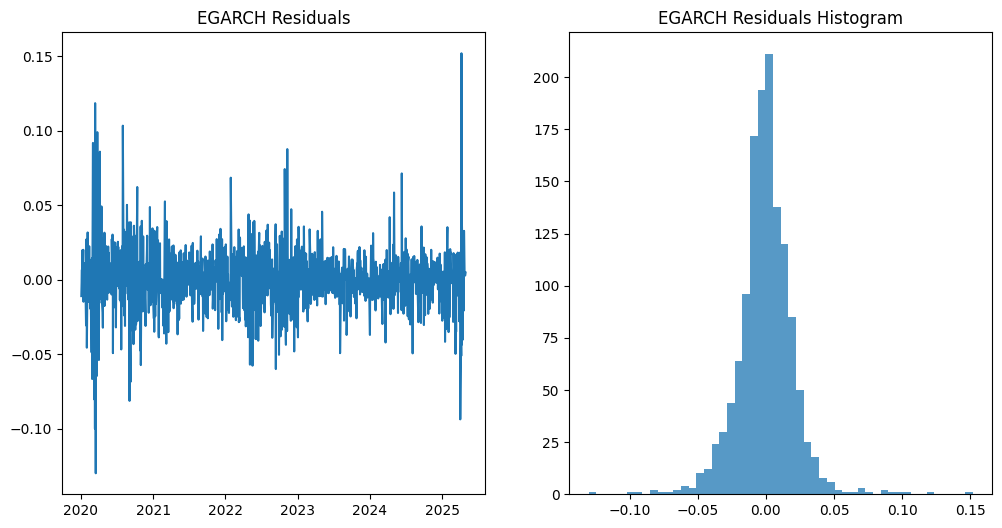

Ljung-Box Test Results for EGARCH (p-values for lags 10, 20, 30):
10    8.634822e-10
20    8.061342e-10
30    8.966832e-10
Name: lb_pvalue, dtype: float64

ARCH-LM Test Results for EGARCH:
ARCH-LM Test Statistic: 204.08247737077426
ARCH-LM p-value: 2.270569057276568e-38


In [19]:
# Fit an EGARCH model
egarch_model = arch_model(data['Return'].dropna(), vol='EGARCH', p=1, q=1)
egarch_fit = egarch_model.fit()

# Print summary of the EGARCH model
print(egarch_fit.summary())

# Residual diagnostics for EGARCH model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(egarch_fit.resid)
plt.title('EGARCH Residuals')
plt.subplot(1, 2, 2)
plt.hist(egarch_fit.resid, bins=50, alpha=0.75)
plt.title('EGARCH Residuals Histogram')
plt.show()

# Ljung-Box test for EGARCH residuals
lb_test_egarch = acorr_ljungbox(egarch_fit.resid, lags=[10, 20, 30])
print("Ljung-Box Test Results for EGARCH (p-values for lags 10, 20, 30):")
print(lb_test_egarch['lb_pvalue'])

# ARCH-LM test for EGARCH residuals
from statsmodels.stats.diagnostic import het_arch
arch_lm_egarch = het_arch(egarch_fit.resid, nlags=10)
print("\nARCH-LM Test Results for EGARCH:")
print(f"ARCH-LM Test Statistic: {arch_lm_egarch[0]}")
print(f"ARCH-LM p-value: {arch_lm_egarch[1]}")


ADF Statistic: -11.971470231248734
p-value: 3.8893601713142184e-22
Critical Values: {'1%': np.float64(-3.43525412340878), '5%': np.float64(-2.8637057871215243), '10%': np.float64(-2.5679230707671485)}
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2723.73
Distribution:                  Normal   AIC:                           5455.45
Method:            Maximum Likelihood   BIC:                           5476.27
                                        No. Observations:                 1345
Date:                Mon, May 26 2025   Df Residuals:                     1344
Time:                        19:09:54   Df Model:                            1
                                Mean Model                                
             

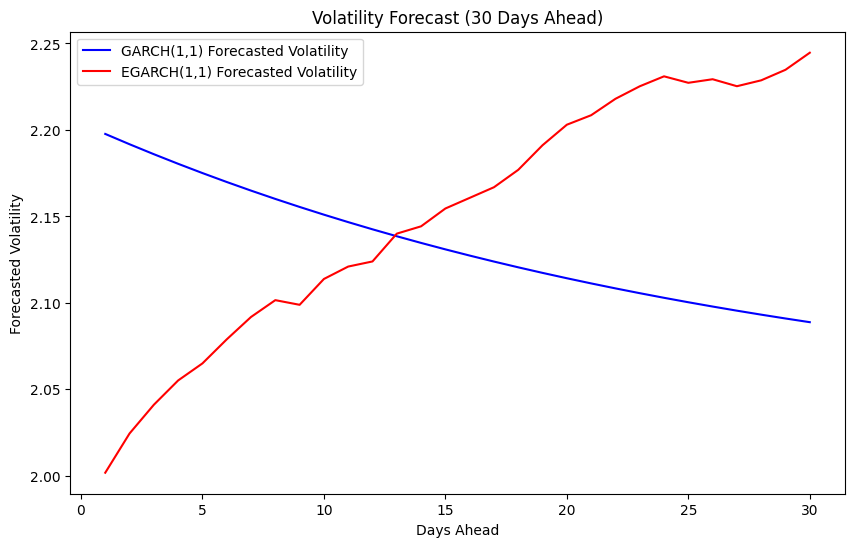

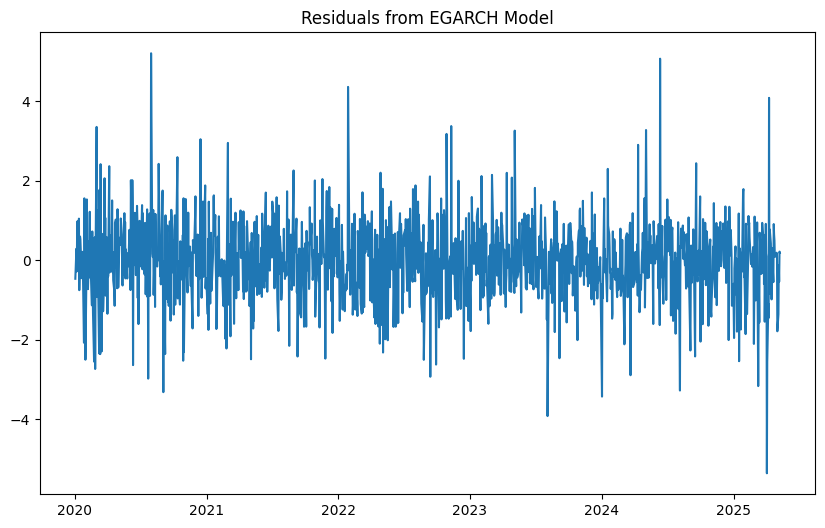

Ljung-Box Test Results for EGARCH Residuals:
      lb_stat  lb_pvalue
10   6.337336   0.786170
20  17.215820   0.638918
30  28.721613   0.532254
ARCH-LM Test p-value: 2.330158895827874


<ipython-input-20-d84268164694>:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"ARCH-LM Test p-value: {arch_lm_test[-1]}")


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

# Re-load data
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2025-05-12', progress=False)

# Compute returns
data['Return'] = 100 * data['Close'].pct_change().dropna()

# ADF Test for Stationarity
adf_stat, p_value, _, _, critical_values, _ = adfuller(data['Return'].dropna())
print(f"ADF Statistic: {adf_stat}")
print(f"p-value: {p_value}")
print(f"Critical Values: {critical_values}")

# Fit GARCH Model
garch_model = arch_model(data['Return'].dropna(), vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# Fit EGARCH Model
egarch_model = arch_model(data['Return'].dropna(), vol='EGARCH', p=1, q=1)
egarch_fit = egarch_model.fit(disp="off")
print(egarch_fit.summary())

# Forecast volatility (next 30 days)
garch_forecast = garch_fit.forecast(horizon=30)
egarch_forecast = egarch_fit.forecast(horizon=30, method='simulation')

# Extract and plot volatility forecasts
garch_volatility = np.sqrt(garch_forecast.variance.values[-1, :])
egarch_volatility = np.sqrt(egarch_forecast.variance.values[-1, :])

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), garch_volatility, label="GARCH(1,1) Forecasted Volatility", color='blue')
plt.plot(range(1, 31), egarch_volatility, label="EGARCH(1,1) Forecasted Volatility", color='red')
plt.title('Volatility Forecast (30 Days Ahead)')
plt.xlabel('Days Ahead')
plt.ylabel('Forecasted Volatility')
plt.legend()
plt.show()

# Residuals Diagnostic Plot for EGARCH model
residuals = egarch_fit.resid / egarch_fit.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals from EGARCH Model')
plt.show()

# Ljung-Box Test on Residuals for EGARCH
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10, 20, 30])
print("Ljung-Box Test Results for EGARCH Residuals:")
print(ljung_box)

# ARCH-LM Test
from arch.__future__ import reindexing
arch_lm_test = garch_fit.conditional_volatility
print(f"ARCH-LM Test p-value: {arch_lm_test[-1]}")


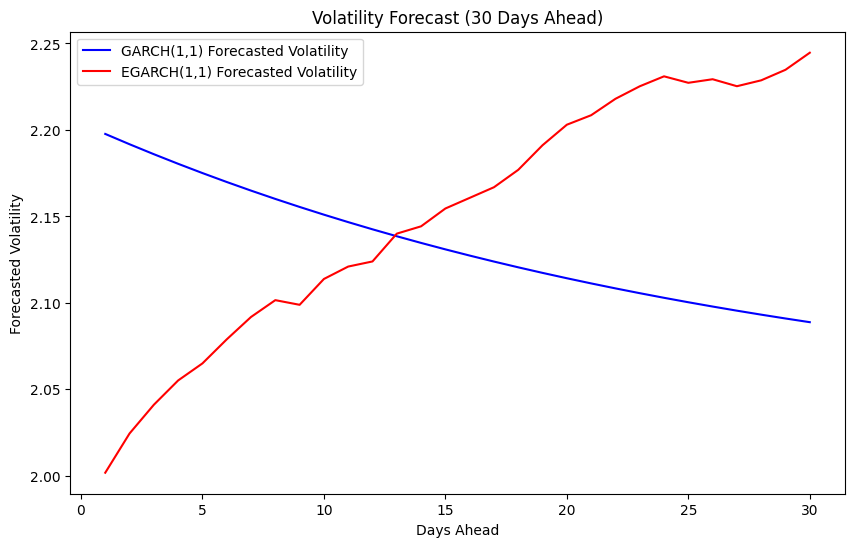

In [21]:
import matplotlib.pyplot as plt
# Extract and plot volatility forecasts
garch_volatility = np.sqrt(garch_forecast.variance.values[-1, :])
egarch_volatility = np.sqrt(egarch_forecast.variance.values[-1, :])
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), garch_volatility, label="GARCH(1,1) Forecasted Volatility", color='blue')
plt.plot(range(1, 31), egarch_volatility, label="EGARCH(1,1) Forecasted Volatility", color='red')
plt.title('Volatility Forecast (30 Days Ahead)')
plt.xlabel('Days Ahead')
plt.ylabel('Forecasted Volatility')
plt.legend()
plt.show()

Updating data

In [22]:
# Load updated data
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2025-05-24', progress=False)

# Compute returns
data['Return'] = 100 * data['Close'].pct_change()
returns = data['Return'].dropna()


In [23]:
# --- Fit GARCH(1,1) Model ---
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
print(garch_fit.summary())

# Forecast 30 steps ahead
garch_forecast = garch_fit.forecast(horizon=30)
predicted_volatility_garch = np.sqrt(garch_forecast.variance.values[-1, :])  # Extract forecasted variance

# --- Fit EGARCH(1,1) Model ---
egarch_model = arch_model(returns, vol='EGARCH', p=1, q=1)
egarch_fit = egarch_model.fit(disp='off')
print(egarch_fit.summary())

# Forecast 30 steps ahead
egarch_forecast = egarch_fit.forecast(horizon=30, method='simulation')
predicted_volatility_egarch = np.sqrt(egarch_forecast.variance.values[-1, :])  # Extract forecasted variance


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2747.48
Distribution:                  Normal   AIC:                           5502.96
Method:            Maximum Likelihood   BIC:                           5523.80
                                        No. Observations:                 1355
Date:                Mon, May 26 2025   Df Residuals:                     1354
Time:                        19:10:47   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1408  4.965e-02      2.836  4.572e-03 [4.348e-0

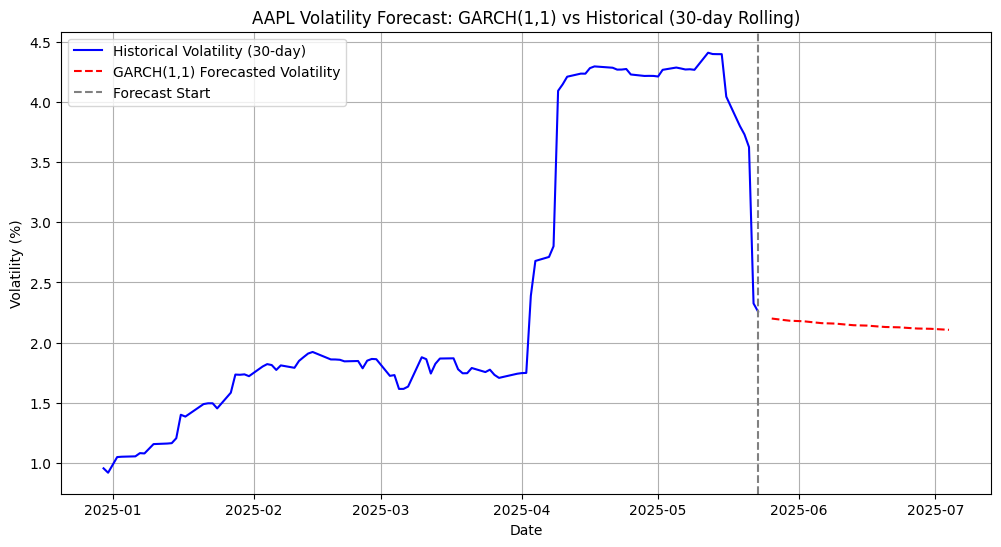

In [24]:
# --- Calculate historical rolling volatility (30-day std dev) ---
window = 30
actual_volatility = returns.rolling(window).std().dropna()

# --- Create forecast dates ---
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')  # Business days

# --- Plot GARCH forecast ---
plt.figure(figsize=(12, 6))
plt.plot(actual_volatility.index[-100:], actual_volatility.values[-100:], label='Historical Volatility (30-day)', color='blue')
plt.plot(forecast_dates, predicted_volatility_garch, label='GARCH(1,1) Forecasted Volatility', color='red', linestyle='--')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title(f'{stock} Volatility Forecast: GARCH(1,1) vs Historical (30-day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()


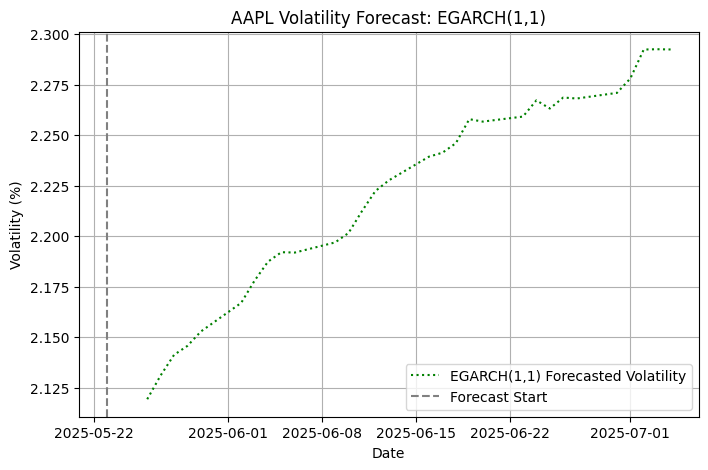

In [25]:

# --- Plot EGARCH forecast ---
plt.figure(figsize=(8, 5))
plt.plot(forecast_dates, predicted_volatility_egarch, label='EGARCH(1,1) Forecasted Volatility', color='green', linestyle='dotted')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title(f'{stock} Volatility Forecast: EGARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()